In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 51.5MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
df.shape

(19820, 18)

In [ ]:
df['make'].nunique(), df['model'].nunique()

(41, 3233)

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [ ]:
X.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
y.head()

,selling_price
0,1.20
1,5.50
2,2.15
3,2.26
4,5.70


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((15856, 17), (3964, 17))

In [ ]:
y_train.shape

(15856,)

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
5662,2013.0,80000,20.54,1598.0,103.6,10.0,5.540306,3.775000,1,0,1,0,0,0,1,1,0
4556,2010.0,97547,16.07,1995.0,181.0,13.0,17.349017,10.923750,0,0,1,0,0,0,0,1,0
7094,2018.0,74000,27.39,1248.0,74.0,5.0,4.684721,6.882857,1,0,1,0,0,0,1,1,0
1441,2019.0,15000,23.84,1199.0,84.0,4.0,4.381194,5.612500,1,0,0,0,0,1,1,1,0
17079,2008.0,110000,13.50,1799.0,130.0,15.0,5.979902,2.840588,1,0,0,0,0,1,1,1,0


In [ ]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
960,2017.0,80000,21.64,1461.0,84.8,6.0,4.606651,4.442857,1,0,1,0,0,0,1,1,0
4073,2015.0,61500,20.14,1498.0,88.8,8.0,5.540306,5.031429,0,0,1,0,0,0,1,1,0
4339,2016.0,71400,27.30,1498.0,98.6,7.0,5.979902,5.612500,0,0,1,0,0,0,1,1,0
19325,2016.0,30412,18.70,1199.0,88.7,7.0,5.979902,5.754167,0,0,0,0,0,1,1,1,0
438,2012.0,60000,20.92,998.0,67.1,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_new = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_new, columns = X_train.columns)

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
X_new = scaler.transform(X_test) # only transform. no fit_transform
X_test = pd.DataFrame(X_new, columns = X_test.columns)

In [ ]:
X_test.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.763435,0.502456,0.499903,-0.026017,-0.299979,-0.763435,-0.542630,-0.456837,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,0.137011,0.082550,0.149891,0.045857,-0.210409,-0.137011,-0.284819,-0.330968,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
2,0.450223,0.307257,1.820617,0.045857,0.009035,-0.450223,-0.163433,-0.206702,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,0.450223,-0.623074,-0.186121,-0.534965,-0.212649,-0.450223,-0.163433,-0.176406,-0.799289,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-0.802626,0.048503,0.331897,-0.925417,-0.696322,0.802626,-0.521072,-0.927358,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X1_train, y_train) # learns the parameters.

LinearRegression()

In [ ]:
# y = w*x + w0
print(model.coef_, model.intercept_)

[4.67289908] 6.578468924697273


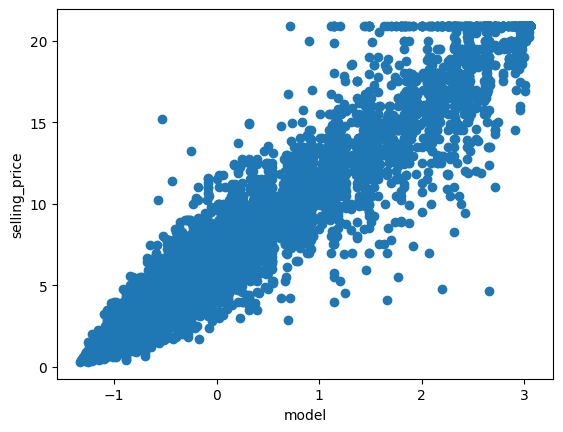

In [ ]:
plt.scatter(X1_train, y_train)
plt.xlabel('model')
plt.ylabel('selling_price')
plt.show();

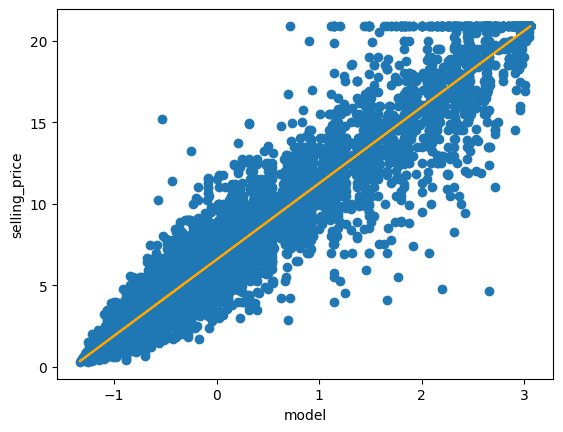

In [ ]:
plt.scatter(X1_train, y_train)
plt.plot(X1_train, model.predict(X1_train), color='orange')
plt.xlabel('model')
plt.ylabel('selling_price')
plt.show();

In [ ]:
y_pred = model.predict(X1_test)
y_pred[:10]

array([ 4.44371573,  5.03189066,  5.61257064,  5.75414187,  2.24501683,
       11.41615833,  2.31729205,  4.24266079,  5.62397599,  1.13683782])

In [ ]:
y_test[:10]

,selling_price
960,7.00
4073,4.75
4339,6.30
19325,5.25
438,2.10
13078,12.00
5760,2.48
9792,3.50
3585,5.00
1147,1.25


In [ ]:
# discussion.
model.score(X1_test, y_test)

0.940979262430343

## Multivariate Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train) # learns the parameters.

LinearRegression()

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
# y = w1.x1 + w2.x2 + ....

print(model2.coef_)
print(model2.intercept_)

[ 0.27813197 -0.14013565 -0.18590768  0.13924039  0.04679916 -0.27813197
  0.24605178  4.02063257 -0.05837169 -0.01638025  0.06013809  0.04818182
  0.01863947 -0.10007882 -0.03729704 -0.09549806 -0.15212018]
6.5784689246972645


In [ ]:
# R2 score.
model2.score(X_test, y_test)

0.9466197443095883

In [ ]:
# R2 score.
model2.score(X_train, y_train)

0.9453672329447975

In [ ]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - y_true.mean())**2)
    score = 1 - (numerator/denominator)
    return score

In [ ]:
# R2 score on train data
r2_score(y_train, model2.predict(X_train))

0.9453672329447975

In [ ]:
# R2 score on test data
r2_score(y_test, model2.predict(X_test))

0.9466197443095883

In [ ]:
y_pred = model2.predict(X_test)
y_pred[:10]

array([ 4.9405943 ,  5.41944515,  5.79134646,  6.00483191,  1.8135126 ,
       11.784341  ,  2.07682075,  4.16500267,  5.21875115,  0.27207412])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

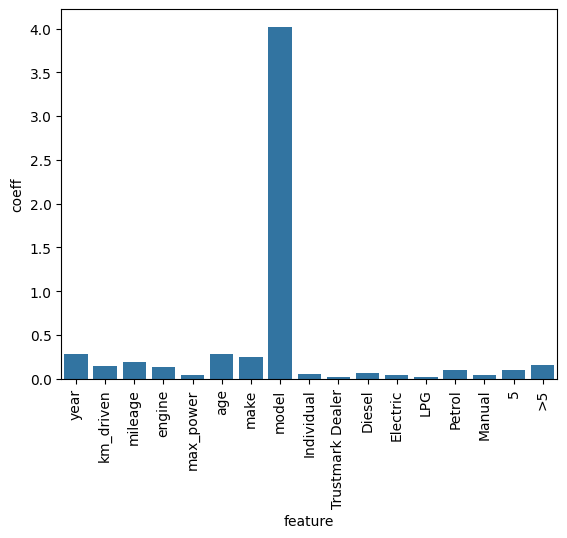

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_train.columns,np.abs(model2.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

# Linear Regression - Scratch Code

In [ ]:
def predict(X, weights):
    return np.dot(X, weights)

In [ ]:
def loss(X, Y, weights):
    Y_hat = predict(X, weights)

    err = np.mean((Y - Y_hat)**2)

    return err

In [ ]:
def gradients(X, Y, weights):

    Y_hat  = predict(X, weights)

    grads = 2*np.dot(X.T , Y_hat - Y)/ len(Y)
    return grads

In [ ]:
def gradient_descent(X, Y, learning_rate=0.1, n_itrs = 300):
    n, d = X.shape

    print(X.shape)
    error_list = []

    # Step1: initialization
    W = np.random.rand(d)

    for _ in range(n_itrs):

        e = loss(X, Y, W)
        error_list.append(e)

        # Step2: Calculate derivatives
        dW = gradients(X, Y, W)

        # Step3: Update W
        W = W - learning_rate*dW

    return W, error_list

In [ ]:
W_best, error_list = gradient_descent(X_train, y_train, learning_rate = 0.1)

(15856, 17)


In [ ]:
W_best

array([ 0.54575048, -0.14034222, -0.17510802,  0.13642728,  0.05285697,
       -0.00781029,  0.25054341,  4.01677495, -0.05953383, -0.01564638,
        0.14048699,  0.04892238,  0.02838136, -0.01496521, -0.03814861,
       -0.05310893, -0.10285614])

In [ ]:
error_list[:5]

[64.64510413700471,
 48.89672094896035,
 47.09202421798253,
 46.493344157863625,
 46.20585397209883]

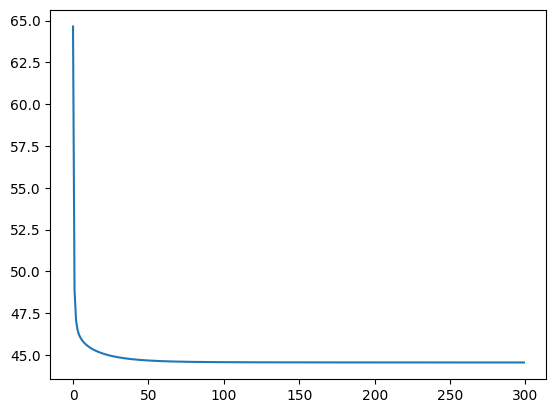

In [ ]:
plt.plot(error_list)

In [ ]:
error_list[-5:]

[44.55125969083878,
 44.55125034466012,
 44.55124113168067,
 44.551232049936566,
 44.551223097494784]

In [ ]:
y_train_pred = predict(X_train, W_best)
y_train_pred[:10]

array([-2.74211842,  4.23692223,  0.34671309, -0.57125688, -4.41562585,
        0.89911573, -1.66089272, -0.57993032, -7.2863055 , -4.24870397])

In [ ]:
r2_score(y_train, y_train_pred)

-0.9099803648611129

In [ ]:
y_pred = predict(X_test, W_best)
y_pred[:10]

array([-1.64299186, -1.16274525, -0.77229853, -0.57054923, -4.75595016,
        5.21512979, -4.50919478, -2.40952927, -1.35575728, -6.29853354])

In [ ]:
r2_score(y_test, y_pred)

-0.8481490347380534

# Incorporated w0

In [ ]:
x0 = pd.DataFrame([1]*len(X_train), columns = ['x0'])

In [ ]:
# Incorporated w0

X_train_new = pd.concat([x0, X_train], axis=1)
X_train_new.head()

,x0,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,1,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
W_best, error_list = gradient_descent(X_train_new, y_train)

(15856, 18)


In [ ]:
W_best.shape

(18,)

In [ ]:
W_best

array([ 6.57846892,  0.59889574, -0.14068809, -0.17246837,  0.13332794,
        0.05738834,  0.04674148,  0.25223063,  4.01499951, -0.05948064,
       -0.01554806,  0.1467854 ,  0.04856926,  0.02921569, -0.00729657,
       -0.03865834, -0.02404204, -0.07131598])

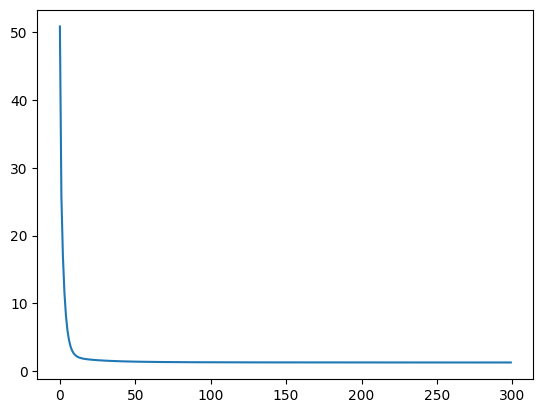

In [ ]:
plt.plot(error_list)

In [ ]:
error_list[-5:]

[1.275434132484862,
 1.2754180237356938,
 1.275402156248609,
 1.2753865263028439,
 1.275371130237953]

In [ ]:
y_train_pred = predict(X_train_new, W_best)
y_train_pred[:10]

array([ 3.83610504, 10.82299716,  6.92452531,  6.00878632,  2.16500105,
        7.4781336 ,  4.91576599,  6.00022965, -0.70131463,  2.32923587])

In [ ]:
r2_score(y_train, y_train_pred)

0.945323491399887

# LinearRegression3

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-0.489414,0.502456,0.243228,0.240112,0.120997,0.489414,-0.284819,-0.599662,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
1,-1.429050,0.900732,-0.799809,1.011304,1.854161,1.429050,2.975929,0.929139,-0.799289,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,-2.012782,0.443384,-0.423776
2,1.076647,0.366270,1.841617,-0.439780,-0.541816,-1.076647,-0.521072,0.064971,1.251112,-0.099681,1.015253,-0.019456,-0.056244,-0.974099,0.496825,0.443384,-0.423776
3,1.389859,-0.972890,1.013255,-0.534965,-0.317892,-1.389859,-0.604885,-0.206702,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776
4,-2.055474,1.183386,-1.399497,0.630564,0.712154,2.055474,-0.163433,-0.799491,1.251112,-0.099681,-0.984977,-0.019456,-0.056244,1.026590,0.496825,0.443384,-0.423776


In [ ]:
y_train.head()

,selling_price
5662,5.25
4556,8.25
7094,7.50
1441,5.70
17079,4.00


In [ ]:
model_final = LinearRegression()
model_final.fit(X_train, y_train)

LinearRegression()

In [ ]:
r2 = model_final.score(X_test, y_test)
r2

0.9466197443095883

In [ ]:
n, d = X_test.shape
print(n, d)

3964 17


In [ ]:
adj_r2 = 1 - ((1-r2) * (n-1) / (n-d-1))
print(adj_r2)

0.9463897736185753


In [ ]:
# adj r2 reducedddddddddddddd.

adj_r2 = 1 - ((1-r2) * (n-1) / (n-(d+1000)-1))
print(adj_r2)

0.9281921407667679


# Statsmodel

In [ ]:
X=df.drop('selling_price', axis=1)
y=df[['selling_price']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

y_train = np.array(y_train)

In [ ]:
X_train.head()

,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
3443,2013.0,67000,15.60,1497.0,116.30,10.0,5.979902,4.364286,0,0,0,0,0,1,0,1,0
16090,2017.0,35000,20.51,998.0,67.04,6.0,4.684721,3.808235,1,0,0,0,0,1,1,1,0
11070,2016.0,130000,21.58,1248.0,88.70,7.0,4.381194,4.450000,1,0,1,0,0,0,0,1,0
19214,2018.0,43266,18.16,1196.0,86.80,5.0,5.858258,5.105000,0,0,0,0,0,1,1,1,0
17843,2011.0,48000,16.20,1493.0,110.00,12.0,5.458819,3.250000,1,0,1,0,0,0,1,1,0


In [ ]:
import statsmodels.api as sm

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.


model = sm.OLS(y_train, X_sm)
results = model.fit()


# statistical summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:29:06   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -8.84e-05    1.9e-06  

In [ ]:
results.predict(X_sm)

,0
3443,4.556349
16090,4.124025
11070,4.754339
19214,5.810158
17843,3.243950
...,...
1099,18.137057
18898,4.712612
11798,8.700178
6637,17.853014


In [ ]:
# mlextend

# Assumptions

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,395.89
13,Petrol,18.29
10,Diesel,17.29
5,age,15.03
16,>5,13.04
15,5,11.75
3,engine,6.30
7,model,6.16
4,max_power,5.02
6,make,3.33


In [ ]:
cols2 = vif["Features"][1:].values # all colns except Year
X2 = pd.DataFrame(X_t, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.701e+04
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:30:17   Log-Likelihood:                -24523.
No. Observations:               15856   AIC:                         4.908e+04
Df Residuals:                   15839   BIC:                         4.921e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9505      0.180  

In [ ]:
X_train[cols2].head()

,Petrol,Diesel,age,>5,5,engine,model,max_power,make,mileage,Manual,LPG,Electric,km_driven,Individual,Trustmark Dealer
3443,1,0,10.0,0,1,1497.0,4.364286,116.30,5.979902,15.60,0,0,0,67000,0,0
16090,1,0,6.0,0,1,998.0,3.808235,67.04,4.684721,20.51,1,0,0,35000,1,0
11070,0,1,7.0,0,1,1248.0,4.450000,88.70,4.381194,21.58,0,0,0,130000,1,0
19214,1,0,5.0,0,1,1196.0,5.105000,86.80,5.858258,18.16,1,0,0,43266,0,0
17843,0,1,12.0,0,1,1493.0,3.250000,110.00,5.458819,16.20,1,0,0,48000,1,0


In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train[cols2], columns=cols2)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,5,51.79
5,engine,50.07
9,mileage,29.88
1,Diesel,29.25
7,max_power,29.03
0,Petrol,24.59
6,model,17.83
8,make,14.24
2,age,12.94
3,>5,11.17


In [ ]:
X_t.drop(columns=['5'], inplace=True)

In [ ]:
X_t.head()

,Petrol,Diesel,age,>5,engine,model,max_power,make,mileage,Manual,LPG,Electric,km_driven,Individual,Trustmark Dealer
3443,1,0,10.0,0,1497.0,4.364286,116.30,5.979902,15.60,0,0,0,67000,0,0
16090,1,0,6.0,0,998.0,3.808235,67.04,4.684721,20.51,1,0,0,35000,1,0
11070,0,1,7.0,0,1248.0,4.450000,88.70,4.381194,21.58,0,0,0,130000,1,0
19214,1,0,5.0,0,1196.0,5.105000,86.80,5.858258,18.16,1,0,0,43266,0,0
17843,0,1,12.0,0,1493.0,3.250000,110.00,5.458819,16.20,1,0,0,48000,1,0


In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,engine,47.75
6,max_power,28.80
1,Diesel,26.08
8,mileage,22.07
0,Petrol,19.62
5,model,17.61
7,make,14.23
2,age,12.70
9,Manual,8.65
12,km_driven,2.60


In [ ]:
X_t.drop(columns=['engine'], inplace=True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Diesel,23.39
7,mileage,21.55
5,max_power,18.36
0,Petrol,18.33
4,model,17.44
6,make,14.06
2,age,11.96
8,Manual,8.47
11,km_driven,2.57
12,Individual,1.78


In [ ]:
X_t.drop(columns=['Diesel'], inplace=True)

In [ ]:
vif = pd.DataFrame()

vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,max_power,17.68
3,model,16.74
5,make,14.05
6,mileage,13.27
1,age,10.56
7,Manual,8.14
10,km_driven,2.56
0,Petrol,2.17
11,Individual,1.76
2,>5,1.64


In [ ]:
model = LinearRegression()
model.fit(X_t, y_train)

model.score(X_t, y_train)

0.9448675810554413

In [ ]:
y_hat = model.predict(X_t)

In [ ]:
errs = y_train - y_hat
errs[:10]

array([[ 0.18181531],
       [-0.13460118],
       [-0.43319896],
       [ 0.38043257],
       [-0.04845661],
       [-0.59024458],
       [ 2.22148883],
       [ 1.6655996 ],
       [-0.47530669],
       [-0.61766083]])

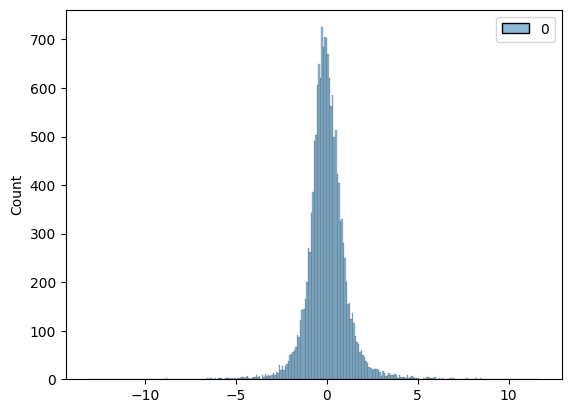

In [ ]:
import seaborn as sns
sns.histplot(errs);

In [ ]:
from scipy import stats
res = stats.shapiro(errs) # SHAPIRO WILK p-value < 0.05
res.statistic

0.8900542035040424

Text(0, 0.5, 'Residuals')

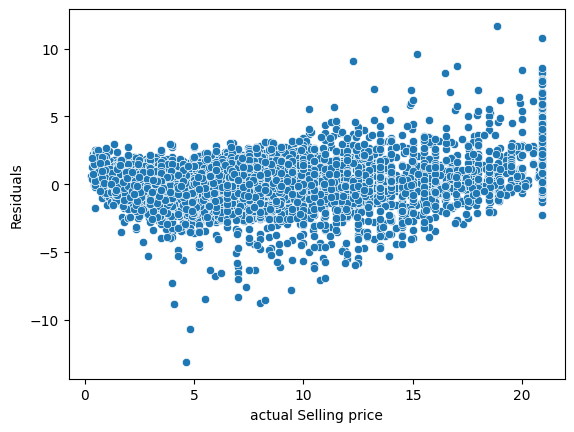

In [ ]:
sns.scatterplot(x = y_train.reshape(-1,), y = errs.reshape(-1,));
plt.xlabel("actual Selling price")
plt.ylabel("Residuals")

In [ ]:
# how to do scaling in train test data